<a href="https://colab.research.google.com/github/reazmoj/HousePriceMachineLearning/blob/main/housePricePredection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **House Price Predection With Regression Technique**

## predict house price from multiple features

# Import Libararies
add some neccessury libararies


In [ ]:
import pandas as pn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%matplotlib inline

# Read Data
read dataset(train data and test data) from my google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

train_data = pn.read_csv("./drive/MyDrive/GameTheoryCourse/HouseDataset/train.csv")
test_data = pn.read_csv("./drive/MyDrive/GameTheoryCourse/HouseDataset/test.csv")

# Some information from data
data shape and some data example

In [ ]:
train_data.shape

In [ ]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Drope some unneccessury data from data set

In [ ]:
train_data = train_data[["MSSubClass","LotFrontage","LotArea","YearBuilt", "MasVnrArea", "BsmtFinSF1", "BsmtUnfSF", "TotalBsmtSF", "GrLivArea", "BedroomAbvGr", "GarageArea", "YrSold", "SalePrice"]]
test_data = test_data[["MSSubClass","LotFrontage","LotArea","YearBuilt", "MasVnrArea", "BsmtFinSF1", "BsmtUnfSF", "TotalBsmtSF", "GrLivArea", "BedroomAbvGr", "GarageArea", "YrSold"]]

# Normalized Data
set zero all of non-number data from data set
next step normalized data with calculate mean and sigam

In [ ]:
feature_list = ["MSSubClass","LotFrontage","LotArea","YearBuilt", "MasVnrArea", "BsmtFinSF1", "BsmtUnfSF", "TotalBsmtSF", "GrLivArea", "BedroomAbvGr", "GarageArea", "YrSold", "SalePrice"]
for feature in feature_list:
  train_data[feature] = pn.to_numeric(train_data[feature], errors ='coerce').fillna(0).astype('int')
  if feature != "SalePrice" :
    test_data[feature] = pn.to_numeric(test_data[feature], errors ='coerce').fillna(0).astype('int')

In [ ]:
train_data.head()

,MSSubClass,LotFrontage,LotArea,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GrLivArea,BedroomAbvGr,GarageArea,YrSold,SalePrice
0,60,65,8450,2003,196,706,150,856,1710,3,548,2008,208500
1,20,80,9600,1976,0,978,284,1262,1262,3,460,2007,181500
2,60,68,11250,2001,162,486,434,920,1786,3,608,2008,223500
3,70,60,9550,1915,0,216,540,756,1717,3,642,2006,140000
4,60,84,14260,2000,350,655,490,1145,2198,4,836,2008,250000


In [ ]:
X_features = train_data[["MSSubClass","LotFrontage","LotArea","YearBuilt", "MasVnrArea", "BsmtFinSF1", "BsmtUnfSF", "TotalBsmtSF", "GrLivArea", "BedroomAbvGr", "GarageArea", "YrSold"]]
Y_features = train_data["SalePrice"]
C_features = len(Y_features)

In [ ]:
meanOfFeatures = X_features.mean()
stdOfFeatures = X_features.std()

X_featuresNormaled = (X_features - meanOfFeatures) / stdOfFeatures
X_featuresNormaled.head()

,MSSubClass,LotFrontage,LotArea,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GrLivArea,BedroomAbvGr,GarageArea,YrSold
0,0.073350,0.212804,-0.207071,1.050634,0.513928,0.575228,-0.944267,-0.459145,0.370207,0.163723,0.350880,0.138730
1,-0.872264,0.645526,-0.091855,0.156680,-0.570555,1.171591,-0.641008,0.466305,-0.482347,0.163723,-0.060710,-0.614228
2,0.073350,0.299349,0.073455,0.984415,0.325803,0.092875,-0.301540,-0.313261,0.514836,0.163723,0.631510,0.138730
3,0.309753,0.068564,-0.096864,-1.862993,-0.570555,-0.499103,-0.061648,-0.687089,0.383528,0.163723,0.790533,-1.367186
4,0.073350,0.760919,0.375020,0.951306,1.366021,0.463410,-0.174805,0.199611,1.298881,1.389547,1.697903,0.138730


# Plot Dependency price of house with each featres

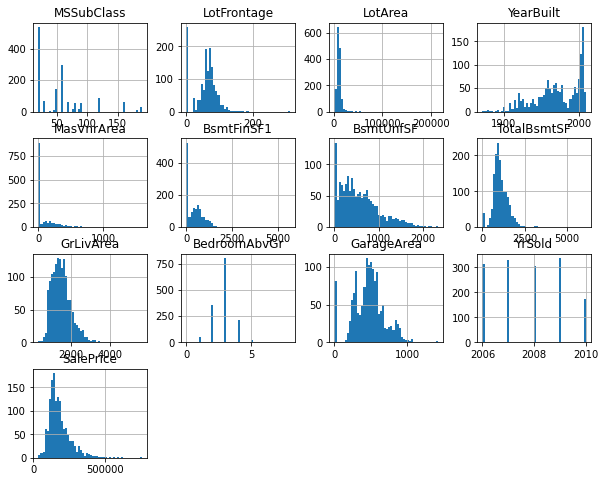

In [ ]:
train_data.hist(bins=50, figsize=(10, 8))
plt.show()

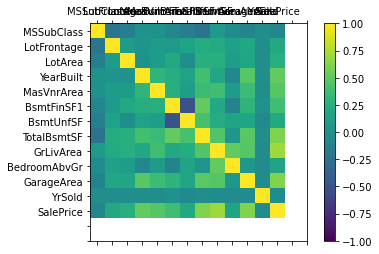

In [ ]:
df=train_data
correlations= df.corr()
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(correlations,vmin=-1,vmax=1)
fig.colorbar(cax)
ticks=np.arange(0,15,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(feature_list)
ax.set_yticklabels(feature_list)
plt.show()

**Top 5 features:**
1.   MSSubClass
2.   BsmtUnfSF
3.   YrSold
4.   BedroomAbvGr
5.   LotArea







**show 3d plot MSSubClass and LotFrontage vs sale price**

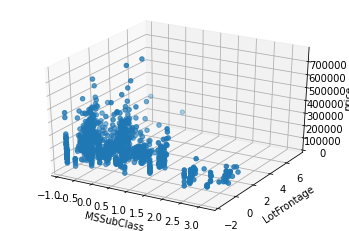

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = X_featuresNormaled[['MSSubClass']]
ys = X_featuresNormaled[['LotFrontage']]
zs = Y_features
ax.scatter(xs, ys, zs)

ax.set_xlabel('MSSubClass')
ax.set_ylabel('LotFrontage')
ax.set_zlabel('price')

plt.show()

# Cost function code

In [ ]:
def cost_function(X, Y, theta):
 m = len(Y)
 J = np.sum((X.dot(theta) - Y) ** 2)/(2 * m)
 return J

# Batch Gradient Decent Function

In [ ]:
def batch_gradient_descent(X, Y, theta, alpha, iterations):
 cost_history = [0] * iterations
 m = len(Y)
 
 for iteration in range(iterations):

  # Hypothesis Values
  h = X.dot(theta)

  # Difference b/w Hypothesis and Actual Y
  loss = h - Y

  # Gradient Calculation
  gradient = X.T.dot(loss) / m

  # Changing Values of B using Gradient
  theta = theta - alpha * gradient

  # New Cost Value
  cost = cost_function(X, Y, theta)
  cost_history[iteration] = cost

  if iteration % 50 == 0 :
      print('iteration : ', iteration, ' loss : ', loss[0]) 

 return theta, cost_history

# Add bias column to features matrix

In [ ]:
X_featuresNormaled = np.c_[np.ones(len(X_featuresNormaled),dtype='int64'),X_featuresNormaled]

print(X_featuresNormaled)

[[ 1.          0.07334983  0.21280428 ...  0.16372302  0.35088009
   0.13872995]
 [ 1.         -0.87226388  0.64552608 ...  0.16372302 -0.06071021
  -0.61422816]
 [ 1.          0.07334983  0.29934864 ...  0.16372302  0.63150985
   0.13872995]
 ...
 [ 1.          0.30975326  0.2416524  ...  1.38954664 -1.03356002
   1.64464619]
 [ 1.         -0.87226388  0.29934864 ... -1.06210061 -1.08968597
   1.64464619]
 [ 1.         -0.87226388  0.50128548 ...  0.16372302 -0.92130812
   0.13872995]]


# Calculate Theta and cost with written functions

In [ ]:
theta = np.zeros(X_featuresNormaled.shape[1])
alpha = 0.005
iter_ = 2000
newTheta, cost_history = batch_gradient_descent(X_featuresNormaled, Y_features, theta, alpha, iter_)

iteration :  0  loss :  -208500.0
iteration :  50  loss :  -153678.59182123552
iteration :  100  loss :  -114826.4445077468
iteration :  150  loss :  -86296.32042506464
iteration :  200  loss :  -64836.77280960884
iteration :  250  loss :  -48439.061723421124
iteration :  300  loss :  -35778.66283110174
iteration :  350  loss :  -25934.537770849915
iteration :  400  loss :  -18240.652337232837
iteration :  450  loss :  -12202.314381090691
iteration :  500  loss :  -7445.637994322198
iteration :  550  loss :  -3684.901822890446
iteration :  600  loss :  -700.2332993788586
iteration :  650  loss :  1678.3206474122708
iteration :  700  loss :  3582.512659526401
iteration :  750  loss :  5114.690366686875
iteration :  800  loss :  6354.48223120271
iteration :  850  loss :  7363.920688778744
iteration :  900  loss :  8191.387633423175
iteration :  950  loss :  8874.662669740763
iteration :  1000  loss :  9443.283064431977
iteration :  1050  loss :  9920.373379466997
iteration :  1100  loss 

# Showing loss value

In [ ]:
h = X_featuresNormaled.dot(newTheta)
loss = h - Y_features

print(sum(loss))

-11695.096159231995


# Plot decreasing cost value in each itration

Text(0, 0.5, 'cost history')

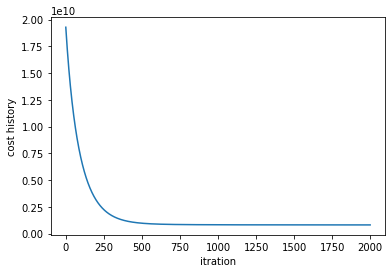

In [ ]:
plt.plot(cost_history)
plt.xlabel('itration')
plt.ylabel('cost history') 

# Prediction function 

In [ ]:
def pred(x_test, newTheta):
  meanOfFeatures = x_test.mean()
  stdOfFeatures = x_test.std()

  x_testNormalized = (x_test - meanOfFeatures) / stdOfFeatures
  x_testNormalized = np.c_[np.ones(len(x_testNormalized),dtype='int64'),x_testNormalized]

  return x_testNormalized.dot(newTheta)

In [ ]:
y_ = pred(test_data, newTheta)

# Show Some Dependecy Features With Predected House Price

In [ ]:
plt.figure(figsize = (10,8))
sns.regplot(test_data['MSSubClass'], y_)
plt.title('MSSubClass vs. Housing Price', fontsize = 20)
plt.show()

In [ ]:
plt.figure(figsize = (10,8))
sns.regplot(test_data['BedroomAbvGr'], y_)
plt.title('BedroomAbvGr vs. Housing Price', fontsize = 20)
plt.show()

In [ ]:
plt.figure(figsize = (10,8))
sns.regplot(test_data['BsmtUnfSF'], y_)
plt.title('BsmtUnfSF vs. Housing Price', fontsize = 20)
plt.show()